<a href="https://colab.research.google.com/github/nidula/Analysing-Crime-Data-LA/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
project_directory = '/content/drive/MyDrive/Analytic Tools/'

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Importing the Crime_Data_from_2010_to_2019.csv Dataset

In [5]:
df = pd.read_csv(project_directory+'/Crime_Data_from_2010_to_2019.csv')

In [6]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119792,190506304,02/22/2019 12:00:00 AM,02/22/2019 12:00:00 AM,840,5,Harbor,569,2,627,CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT,...,AO,Adult Other,627.0,NaN,NaN,NaN,100 W 22ND ST,NaN,33.7257,-118.2801
2119793,190608903,03/28/2019 12:00:00 AM,03/28/2019 12:00:00 AM,400,6,Hollywood,644,1,648,ARSON,...,IC,Invest Cont,648.0,NaN,NaN,NaN,1400 N LA BREA AV,NaN,34.0962,-118.3490
2119794,192004409,01/06/2019 12:00:00 AM,01/06/2019 12:00:00 AM,2100,20,Olympic,2029,2,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,...,IC,Invest Cont,930.0,NaN,NaN,NaN,6TH,VIRGIL,34.0637,-118.2870
2119795,191716777,10/17/2019 12:00:00 AM,10/16/2019 12:00:00 AM,1800,17,Devonshire,1795,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,17200 NAPA ST,NaN,34.2266,-118.5085


In [7]:
df.nunique()

DR_NO             2119797
Date Rptd            4497
DATE OCC             3652
TIME OCC             1439
AREA                   21
AREA NAME              21
Rpt Dist No          1303
Part 1-2                2
Crm Cd                142
Crm Cd Desc           142
Mocodes            486164
Vict Age              112
Vict Sex                6
Vict Descent           20
Premis Cd             325
Premis Desc           320
Weapon Used Cd         80
Weapon Desc            79
Status                  9
Status Desc             6
Crm Cd 1              148
Crm Cd 2              143
Crm Cd 3               63
Crm Cd 4               12
LOCATION            75540
Cross Street        12878
LAT                  5437
LON                  5097
dtype: int64

In [8]:
df.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'}, inplace=True)

In [9]:
df.Crm_Cd_Desc.unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
    

In [10]:
df.rename(columns={'DATE OCC': 'DATE_OCC'}, inplace=True)

In [11]:
df['DATE_OCC'] = pd.to_datetime(df['DATE_OCC'])

In [12]:
lowest_date = df['DATE_OCC'].min()
highest_date = df['DATE_OCC'].max()

print(f'Lowest date: {lowest_date}')
print(f'Highest date: {highest_date}')

Lowest date: 2010-01-01 00:00:00
Highest date: 2019-12-31 00:00:00


## Importing the Crime_Data_from_2020_to_Present.csv Dataset

In [13]:
df1 = pd.read_csv(project_directory+'/Crime_Data_from_2020_to_Present.csv')

In [14]:
df1

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682330,230806871,03/03/2023 12:00:00 AM,03/02/2023 12:00:00 AM,620,8,West LA,889,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2000 S HOLT AV,NaN,34.0412,-118.3814
682331,231104474,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,1240,11,Northeast,1107,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,1000 MILWAUKEE AV,NaN,34.1214,-118.1915
682332,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
682333,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054


In [15]:
df1.nunique()

DR_NO             682335
Date Rptd           1168
DATE OCC            1168
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1194
Part 1-2               2
Crm Cd               137
Crm Cd Desc          137
Mocodes           233172
Vict Age             102
Vict Sex               4
Vict Descent          19
Premis Cd            309
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             139
Crm Cd 2             120
Crm Cd 3              35
Crm Cd 4               6
LOCATION           61184
Cross Street        9082
LAT                 5379
LON                 4958
dtype: int64

In [16]:
df1.rename(columns={'Crm Cd Desc': 'Crm_Cd_Desc'}, inplace=True)

In [17]:
df1.rename(columns={'DATE OCC': 'DATE_OCC'}, inplace=True)

In [18]:
df1['DATE_OCC'] = pd.to_datetime(df1['DATE_OCC'])

In [19]:
lowest_date = df1['DATE_OCC'].min()
highest_date = df1['DATE_OCC'].max()

print(f'Lowest date: {lowest_date}')
print(f'Highest date: {highest_date}')

Lowest date: 2020-01-01 00:00:00
Highest date: 2023-03-13 00:00:00


## Data Cleaning 

## Connecting both datasets from 2010 to 2019 and from 2020 to 2023

In [20]:
crime_df = pd.concat([df, df1]).sort_values('DATE_OCC')

In [21]:
crime_df

,DR_NO,Date Rptd,DATE_OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm_Cd_Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,AREA
103445,101720395,11/01/2010 12:00:00 AM,2010-01-01,1200,17.0,Devonshire,1727,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,10300 TAMPA AV,NaN,34.2573,-118.5536,NaN
204285,170807798,03/23/2017 12:00:00 AM,2010-01-01,5,8.0,West LA,834,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,10500 KINNARD AV,NaN,34.0583,-118.4282,NaN
204275,171324225,10/02/2017 12:00:00 AM,2010-01-01,1,13.0,Newton,1362,1,121,"RAPE, FORCIBLE",...,Adult Other,121.0,812.0,NaN,NaN,400 E 51ST ST,NaN,33.9966,-118.2674,NaN
204232,101508424,03/13/2010 12:00:00 AM,2010-01-01,1,15.0,N Hollywood,1538,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,5800 TUJUNGA AV,NaN,34.1758,-118.3790,NaN
204229,101504043,01/02/2010 12:00:00 AM,2010-01-01,2000,15.0,N Hollywood,1527,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Adult Other,626.0,NaN,NaN,NaN,TUJUNGA,KITTRIDGE,34.1903,-118.3790,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648513,230207449,03/13/2023 12:00:00 AM,2023-03-13,1530,NaN,Rampart,275,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,1000 S ALVARADO ST,NaN,34.0517,-118.2798,2.0
649962,230906841,03/13/2023 12:00:00 AM,2023-03-13,830,NaN,Van Nuys,932,2,624,BATTERY - SIMPLE ASSAULT,...,Invest Cont,624.0,NaN,NaN,NaN,15100 FRIAR ST,NaN,34.1857,-118.4618,9.0
673866,230807120,03/13/2023 12:00:00 AM,2023-03-13,30,NaN,West LA,836,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,SANTA MONICA BL,BEVERLY GLEN,34.0575,-118.4242,8.0
640937,231307674,03/13/2023 12:00:00 AM,2023-03-13,20,NaN,Newton,1342,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,Invest Cont,626.0,NaN,NaN,NaN,100 E 35TH ST,NaN,34.0179,-118.2731,13.0


## Crime Type Distribution in Los Angeles

In [22]:
unique_crime_codes = crime_df['Crm Cd'].unique()
print(unique_crime_codes)

[354 121 626 341 510 210 900 812 122 821 813 624 928 230 440 470 649 343
 330 745 310 627 930 420 860 815 956 237 810 740 805 320 662 235 760 946
 668 753 623 350 933 520 110 442 220 331 761 763 822 820 951 850 438 437
 886 236 888 943 940 251 664 439 910 901 625 666 950 660 347 648 410 433
 480 351 421 441 474 755 487 434 932 922 345 436 231 471 443 661 647 450
 670 622 654 762 949 653 920 870 475 954 651 352 756 473 902 845 353 865
 840 880 451 806 890 444 903 942 250 924 944 452 435 446 349 113 472 652
 948 882 453 485 884 931 814 921 952 830 445 432 926 906 905 522 904]


In [23]:
count = crime_df['Crm Cd'].value_counts().sort_index().sort_values(ascending=False)
crime_table = pd.DataFrame({'Crime Code': count.index, 'Count': count.values})
print(crime_table)

     Crime Code   Count
0           624  244300
1           510  233388
2           330  205054
3           310  189278
4           440  184997
..          ...     ...
138         904       4
139         472       4
140         926       2
141         905       1
142         453       1

[143 rows x 2 columns]


In [24]:
age_array = crime_table['Crime Code'].to_numpy()
print(age_array)

[624 510 330 310 440 354 740 626 230 420 745 210 341 930 442 331 888 901
 956 761 946 649 236 900 480 350 220 320 860 662 121 627 668 812 343 625
 664 623 237 813 903 753 648 520 810 886 850 940 110 437 815 251 928 410
 910 820 231 352 845 951 763 647 235 902 441 421 821 762 661 890 755 932
 943 922 122 351 522 434 933 666 660 653 920 822 670 250 433 949 805 439
 622 438 806 651 814 654 450 487 760 443 950 474 954 345 756 921 444 870
 471 652 347 944 435 865 451 353 880 473 485 924 931 942 436 840 475 446
 470 452 884 948 349 830 882 113 445 432 952 906 904 472 926 905 453]


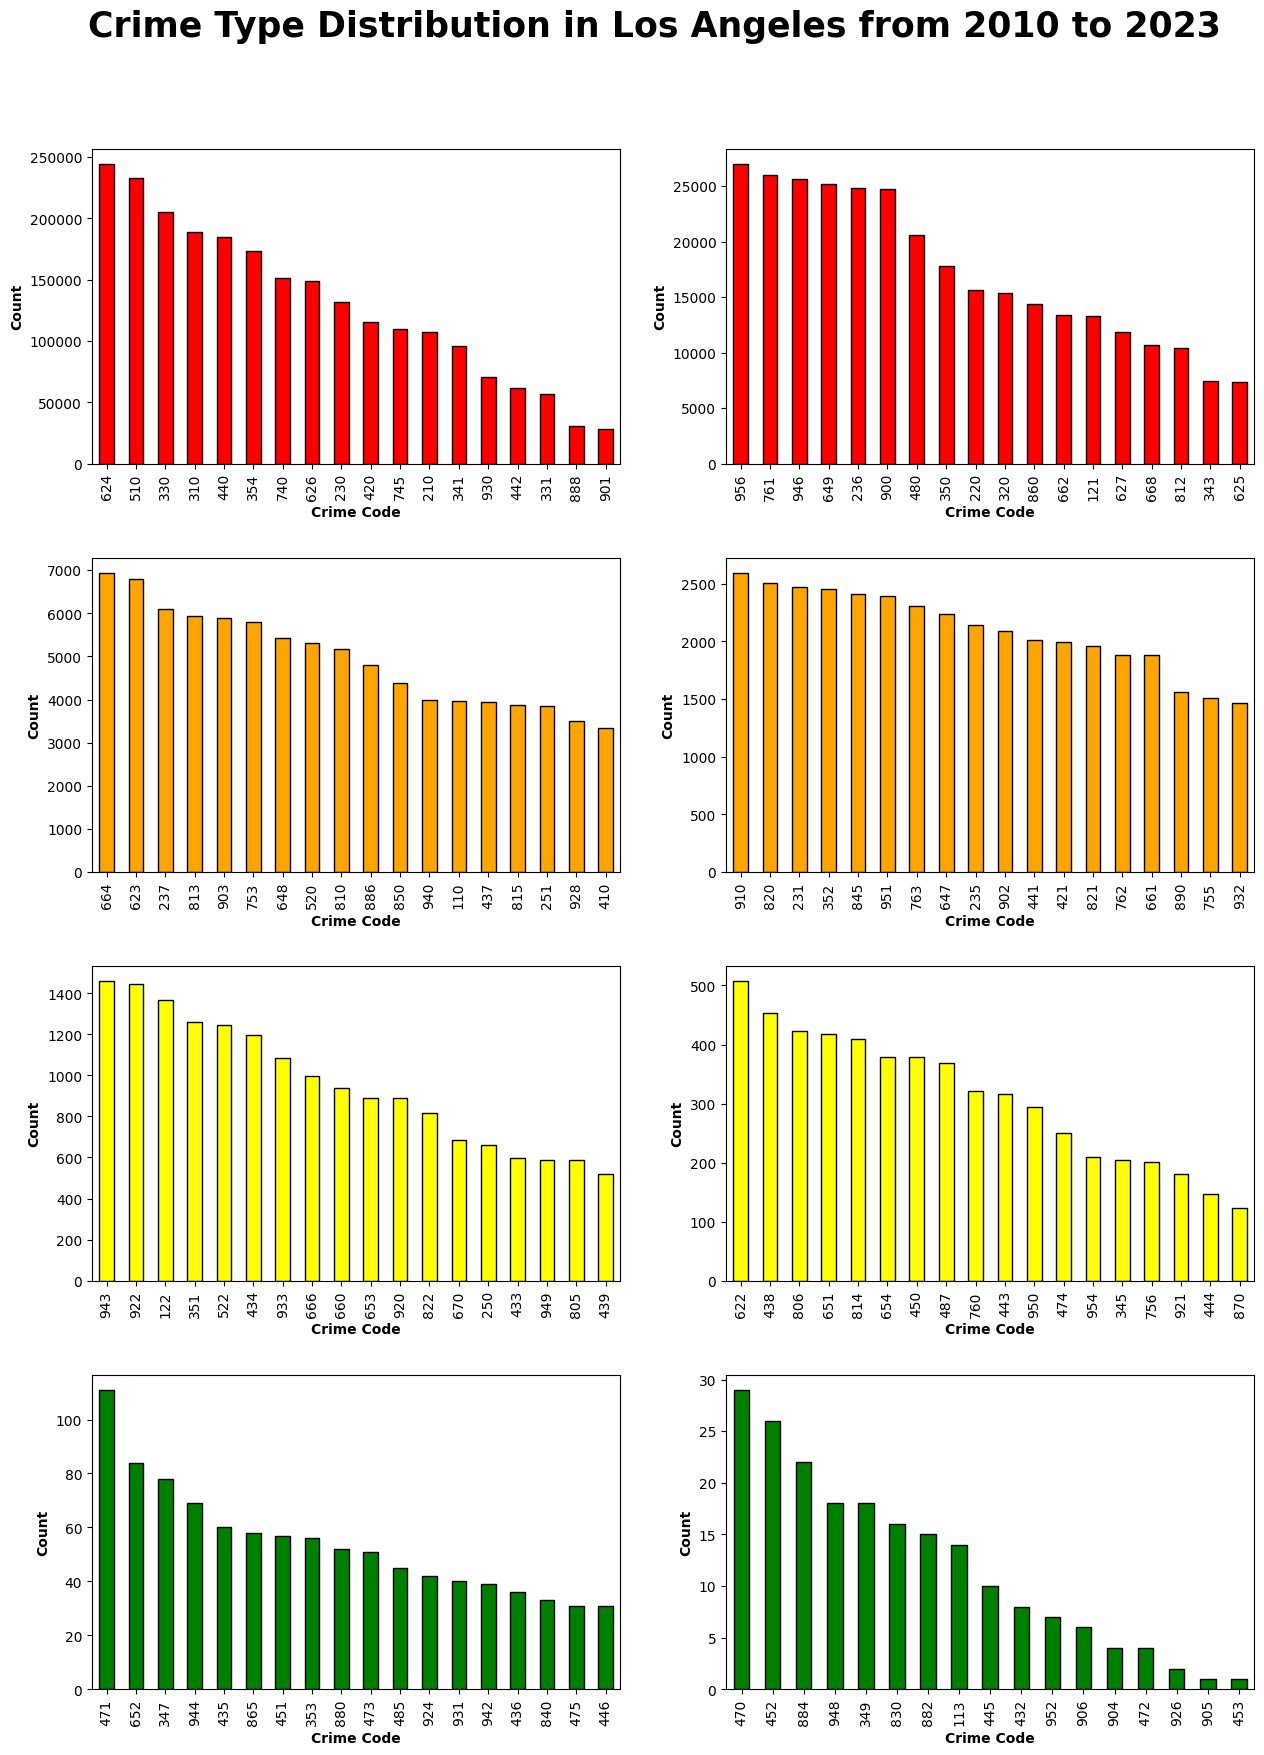

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of occurrences of each value in the 'fruit' column
count = crime_df['Crm Cd'].value_counts()

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,20))

# Filter the data for specific values
specific_data1 = count.loc[[624, 510, 330, 310, 440, 354, 740, 626, 230, 420, 745, 210, 341, 930, 442, 331, 888, 901]]
specific_data2 = count.loc[[956, 761, 946, 649, 236, 900, 480, 350, 220, 320, 860, 662, 121, 627, 668, 812, 343, 625]]
specific_data3 = count.loc[[664, 623, 237, 813, 903, 753, 648, 520, 810, 886, 850, 940, 110, 437, 815, 251, 928, 410]]
specific_data4 = count.loc[[910, 820, 231, 352, 845, 951, 763, 647, 235, 902, 441, 421, 821, 762, 661, 890, 755, 932]]
specific_data5 = count.loc[[943, 922, 122, 351, 522, 434, 933, 666, 660, 653, 920, 822, 670, 250, 433, 949, 805, 439]]
specific_data6 = count.loc[[622, 438, 806, 651, 814, 654, 450, 487, 760, 443, 950, 474, 954, 345, 756, 921, 444, 870]]
specific_data7 = count.loc[[471, 652, 347, 944, 435, 865, 451, 353, 880, 473, 485, 924, 931, 942, 436, 840, 475, 446]]
specific_data8 = count.loc[[470, 452, 884, 948, 349, 830, 882, 113, 445, 432, 952, 906, 904, 472, 926, 905, 453]]

# Create a bar plot for the specific data
specific_data1.plot(kind='bar', color='red', ax=axs[0, 0], edgecolor = 'black')
axs[0, 0].set_ylabel('Count', fontweight='bold')
axs[0, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data2.plot(kind='bar', color='red', ax=axs[0, 1], edgecolor = 'black')
axs[0, 1].set_ylabel('Count', fontweight='bold')
axs[0, 1].set_xlabel('Crime Code', fontweight='bold')

specific_data3.plot(kind='bar', color='orange', ax=axs[1, 0], edgecolor = 'black')
axs[1, 0].set_ylabel('Count', fontweight='bold')
axs[1, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data4.plot(kind='bar', color='orange', ax=axs[1, 1], edgecolor = 'black')
axs[1, 1].set_ylabel('Count', fontweight='bold')
axs[1, 1].set_xlabel('Crime Code', fontweight='bold')

specific_data5.plot(kind='bar', color='yellow', ax=axs[2, 0], edgecolor = 'black')
axs[2, 0].set_ylabel('Count', fontweight='bold')
axs[2, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data6.plot(kind='bar', color='yellow', ax=axs[2, 1], edgecolor = 'black')
axs[2, 1].set_ylabel('Count', fontweight='bold')
axs[2, 1].set_xlabel('Crime Code', fontweight='bold')

specific_data7.plot(kind='bar', color='green', ax=axs[3, 0], edgecolor = 'black')
axs[3, 0].set_ylabel('Count', fontweight='bold')
axs[3, 0].set_xlabel('Crime Code', fontweight='bold')

specific_data8.plot(kind='bar', color='green', ax=axs[3, 1], edgecolor = 'black')
axs[3, 1].set_ylabel('Count', fontweight='bold')
axs[3, 1].set_xlabel('Crime Code', fontweight='bold')

fig.suptitle('Crime Type Distribution in Los Angeles from 2010 to 2023', fontweight='bold', color='black', fontsize=25, y=0.95)
fig.subplots_adjust(hspace=0.3, wspace=0.2)
fig.show()


## The most vulnarable criminal activities area in Los Angeles

In [26]:
unique_crime_areas = crime_df['AREA NAME'].unique()
print(unique_crime_areas)

['Devonshire' 'West LA' 'Newton' 'N Hollywood' 'Foothill' '77th Street'
 'Topanga' 'Van Nuys' 'Mission' 'Hollenbeck' 'Southeast' 'Northeast'
 'West Valley' 'Rampart' 'Wilshire' 'Southwest' 'Pacific' 'Harbor'
 'Central' 'Olympic' 'Hollywood']


In [27]:
count = crime_df['AREA NAME'].value_counts().sort_index().sort_values(ascending=False)
area_table = pd.DataFrame({'Area Name': count.index, 'Count': count.values})
print(area_table)

      Area Name   Count
0   77th Street  188889
1     Southwest  173971
2       Pacific  152019
3   N Hollywood  148208
4     Southeast  146803
5       Central  143933
6     Hollywood  135903
7        Newton  134119
8       Mission  131249
9     Northeast  130086
10      Olympic  129841
11     Van Nuys  128653
12      Topanga  125351
13   Devonshire  124190
14      Rampart  121302
15     Wilshire  120898
16      West LA  120777
17       Harbor  120582
18  West Valley  118294
19   Hollenbeck  103866
20     Foothill  103198


In [28]:
area_df = pd.DataFrame(area_table, columns=['Area Name', 'Count'])
area_df = area_df.set_index('Area Name')
area_df

,Count
Area Name,
77th Street,188889
Southwest,173971
Pacific,152019
N Hollywood,148208
Southeast,146803
Central,143933
Hollywood,135903
Newton,134119
Mission,131249


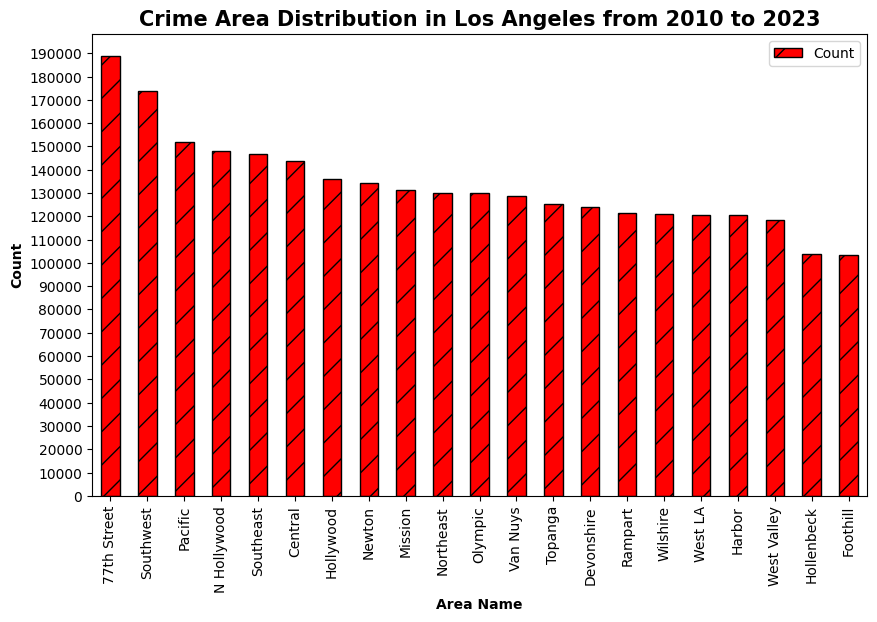

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ar = area_df.plot.bar(figsize=(10,6), edgecolor = 'black', color = 'red', hatch = '/')
ar.set_ylabel('Count', fontweight='bold')
ar.yaxis.set_major_locator(ticker.MultipleLocator(10000))
ar.set_xlabel('Area Name', fontweight='bold')
ar.set_title('Crime Area Distribution in Los Angeles from 2010 to 2023', fontweight='bold', color='black', fontsize=15)
plt.show()

## Analyze the data of victims of the crimes to know which gender and nationality is targeted the most.

In [79]:
count = crime_df.groupby(['Vict Descent']).size().reset_index(name='Count')
vict_table = pd.DataFrame(count)
print(vict_table)

   Vict Descent   Count
0             -       3
1             A   66049
2             B  434529
3             C    3569
4             D      71
5             F    5381
6             G     133
7             H  937521
8             I    1604
9             J    1353
10            K   12780
11            L      62
12            O  257455
13            P     532
14            S      70
15            U     325
16            V     885
17            W  652080
18            X  141102
19            Z     465


In [80]:
vict_df = pd.DataFrame(vict_table, columns=['Vict Descent', 'Count'])
vict_df = vict_df.set_index('Vict Descent')
vict_df

,Count
Vict Descent,
-,3
A,66049
B,434529
C,3569
D,71
F,5381
G,133
H,937521
I,1604


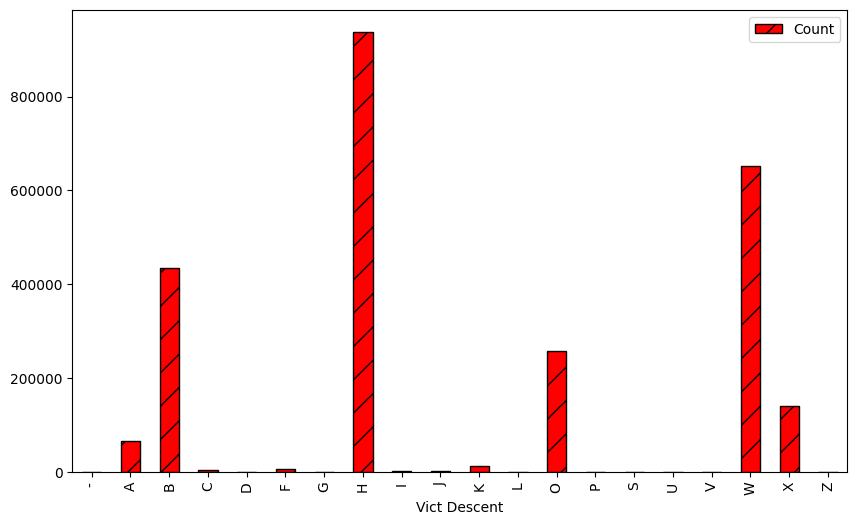

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ar = vict_df.plot.bar(figsize=(10,6), edgecolor = 'black', color = 'red', hatch = '/')

In [82]:
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2802132 entries, 103445 to 679116
Data columns (total 33 columns):
 #   Column          Dtype         
---  ------          -----         
 0   DR_NO           int64         
 1   Date Rptd       object        
 2   DATE_OCC        datetime64[ns]
 3   TIME OCC        int64         
 4   AREA            float64       
 5   AREA NAME       object        
 6   Rpt Dist No     int64         
 7   Part 1-2        int64         
 8   Crm Cd          int64         
 9   Crm_Cd_Desc     object        
 10  Mocodes         object        
 11  Vict Age        int64         
 12  Vict Sex        object        
 13  Vict Descent    object        
 14  Premis Cd       float64       
 15  Premis Desc     object        
 16  Weapon Used Cd  float64       
 17  Weapon Desc     object        
 18  Status          object        
 19  Status Desc     object        
 20  Crm Cd 1        float64       
 21  Crm Cd 2        float64       
 22  Crm Cd 3      

In [83]:
import pandas as pd

# assuming that 'df' is the DataFrame with the date column to split
date_col = 'DATE_OCC_str'  # set the name of the date column here

# split the date column into year, month, and day columns
crime_df[['Year', 'Month', 'Day']] = crime_df[date_col].str.split('-', expand=True)

# convert the year, month, and day columns to the desired data type
crime_df['Year'] = pd.to_numeric(crime_df['Year'])
crime_df['Month'] = pd.to_numeric(crime_df['Month'])
crime_df['Day'] = pd.to_numeric(crime_df['Day'])


In [84]:
count = crime_df.groupby(['Year', 'Vict Descent']).size().reset_index(name='Count')
vict_table = pd.DataFrame(count)
print(vict_table)


     Year Vict Descent  Count
0    2010            A   4416
1    2010            B  33926
2    2010            C     81
3    2010            D      4
4    2010            F    274
..    ...          ...    ...
259  2023            U     12
260  2023            V     43
261  2023            W   8166
262  2023            X   4514
263  2023            Z     26

[264 rows x 3 columns]


In [85]:
vict_year_df = pd.DataFrame(vict_table, columns=['Year', 'Vict Descent', 'Count'])
vict_year_df = vict_year_df.set_index('Year')
vict_year_df

,Vict Descent,Count
Year,,
2010,A,4416
2010,B,33926
2010,C,81
2010,D,4
2010,F,274
...,...,...
2023,U,12
2023,V,43
2023,W,8166


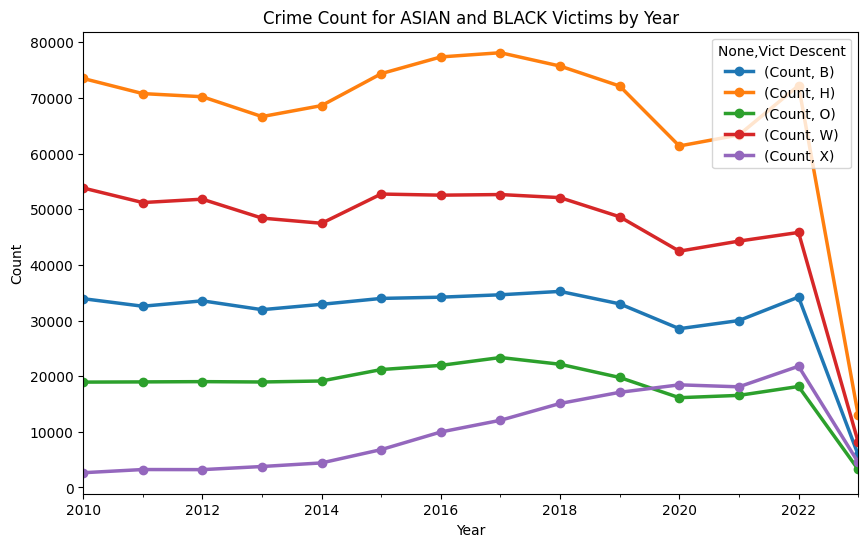

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming that 'vict_table' is the DataFrame containing the data
vict_table['Year'] = pd.to_datetime(vict_table['Year'], format='%Y')

# filter the DataFrame to get only the rows with 'Vict Descent' values 'ASIAN' and 'BLACK'
vict_table_filtered = vict_table.loc[vict_table['Vict Descent'].isin(['H','W','B','O','X']), ['Year', 'Vict Descent', 'Count']].set_index(['Year', 'Vict Descent'])

# pivot the filtered DataFrame to get separate columns for each 'Vict Descent' value
vict_table_pivot = vict_table_filtered.unstack()

# plot the pivoted data in a line graph
ax = vict_table_pivot.plot(kind='line', figsize=(10,6), linewidth=2.5, marker='o', markersize=6)

# set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# set the plot title
ax.set_title('Crime Count for ASIAN and BLACK Victims by Year')

# show the plot
plt.show()


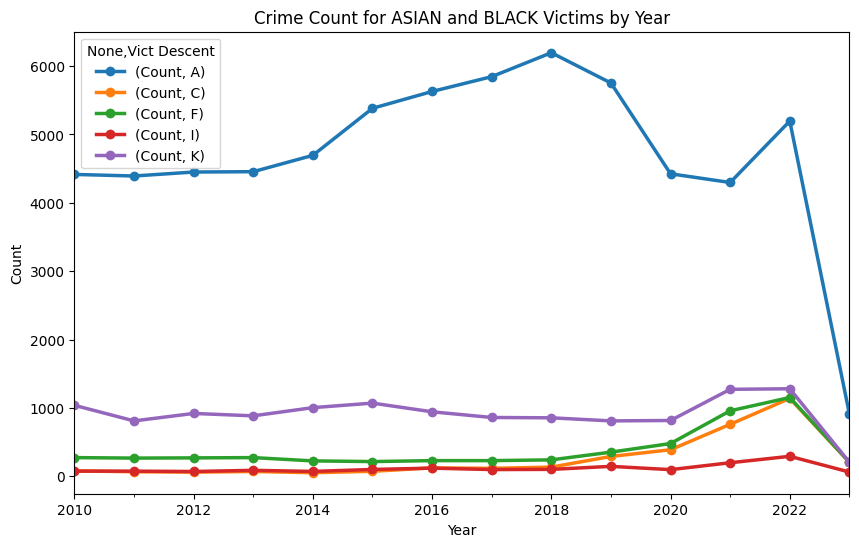

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# assuming that 'vict_table' is the DataFrame containing the data
vict_table['Year'] = pd.to_datetime(vict_table['Year'], format='%Y')

# filter the DataFrame to get only the rows with 'Vict Descent' values 'ASIAN' and 'BLACK'
vict_table_filtered = vict_table.loc[vict_table['Vict Descent'].isin(['K','A','F','C','I']), ['Year', 'Vict Descent', 'Count']].set_index(['Year', 'Vict Descent'])

# pivot the filtered DataFrame to get separate columns for each 'Vict Descent' value
vict_table_pivot = vict_table_filtered.unstack()

# plot the pivoted data in a line graph
ax = vict_table_pivot.plot(kind='line', figsize=(10,6), linewidth=2.5, marker='o', markersize=6)

# set the x-axis and y-axis labels
ax.set_xlabel('Year')
ax.set_ylabel('Count')

# set the plot title
ax.set_title('Crime Count for ASIAN and BLACK Victims by Year')

# show the plot
plt.show()
